In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
parkinsons = pd.read_csv('parkinsons.data')
df = parkinsons.copy()
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [81]:
df.drop(['name','status'],axis=1,inplace=True)

## Section A

#### Standardizing data values

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
std = StandardScaler()
X = std.fit_transform(df)

## Section B

### K-means clustering

Automatically created module for IPython interactive environment


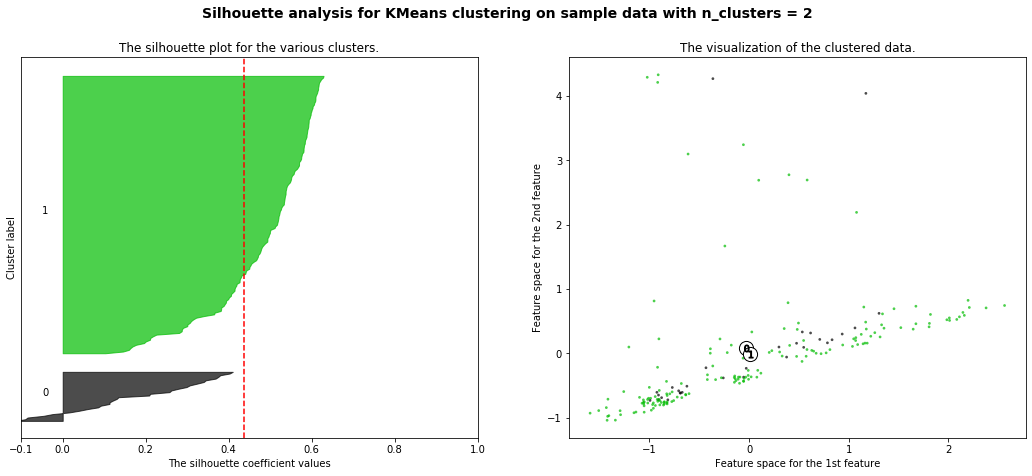

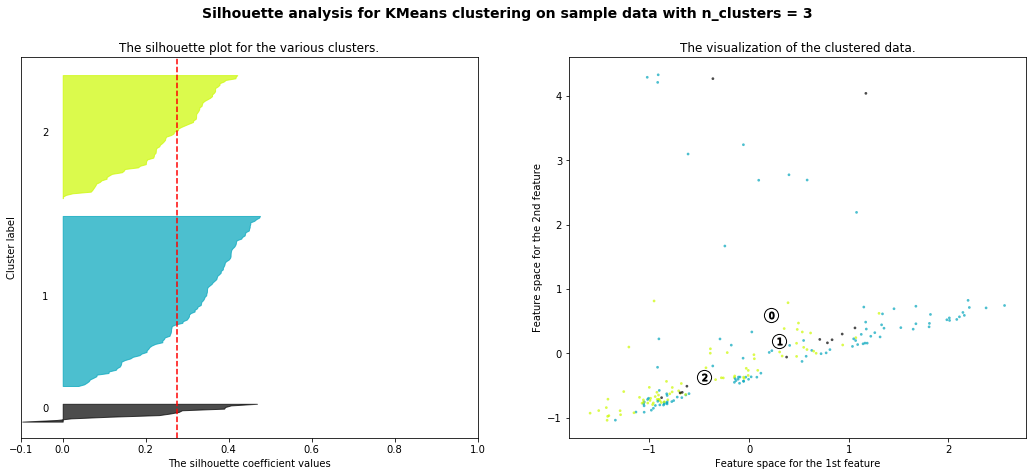

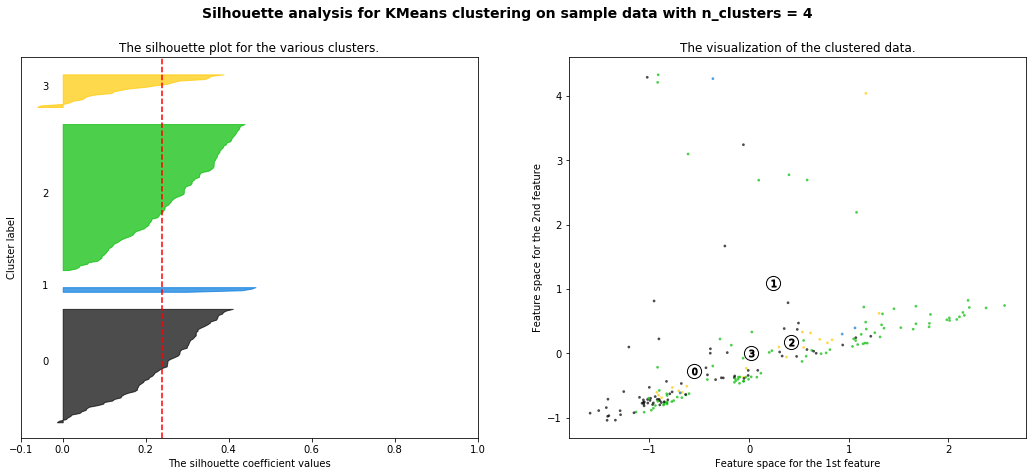

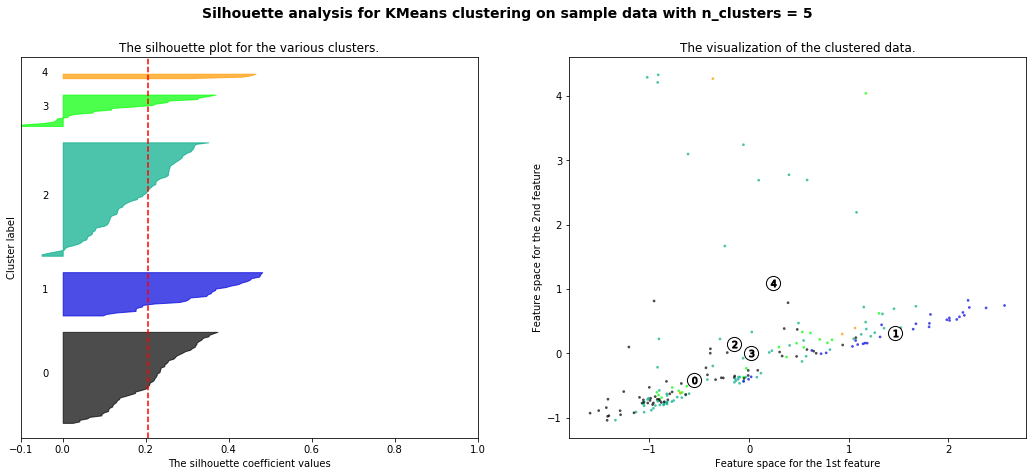

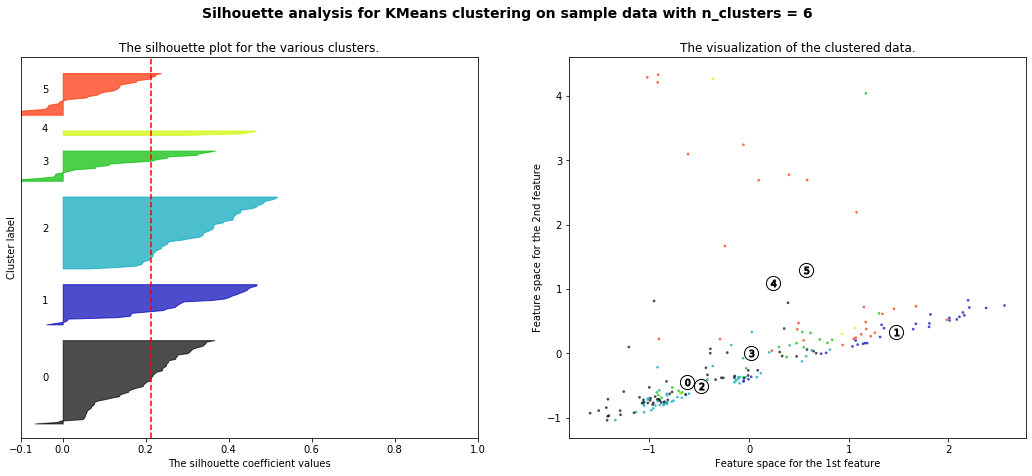

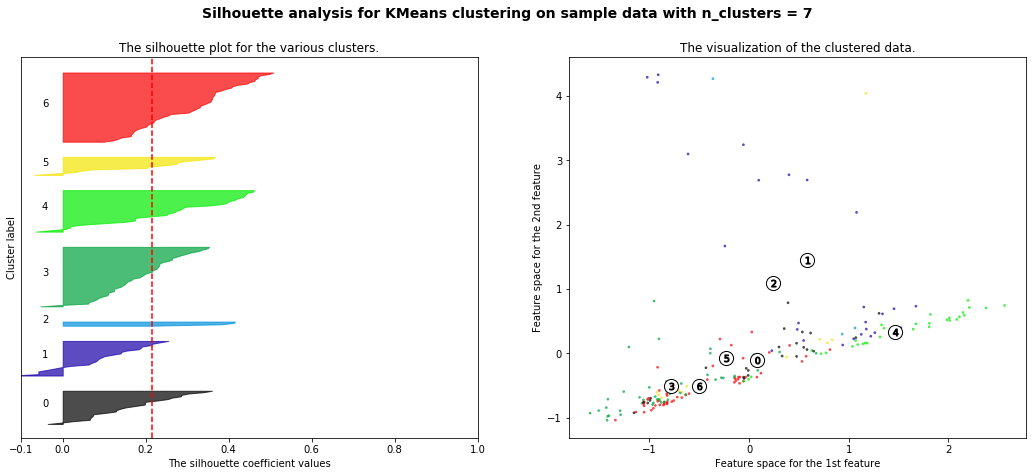

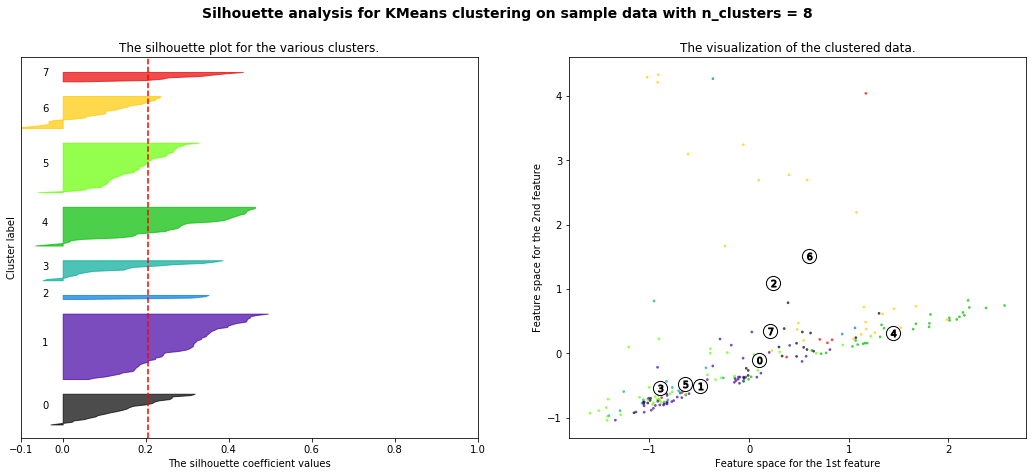

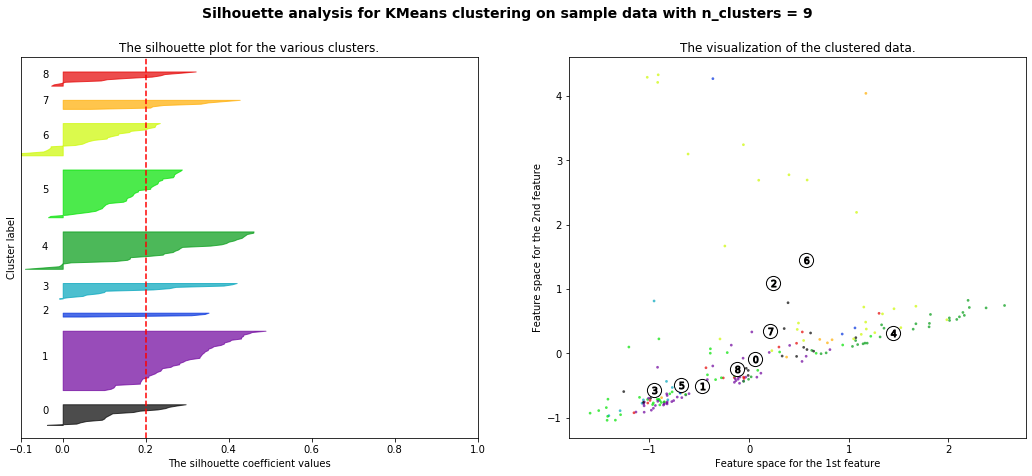

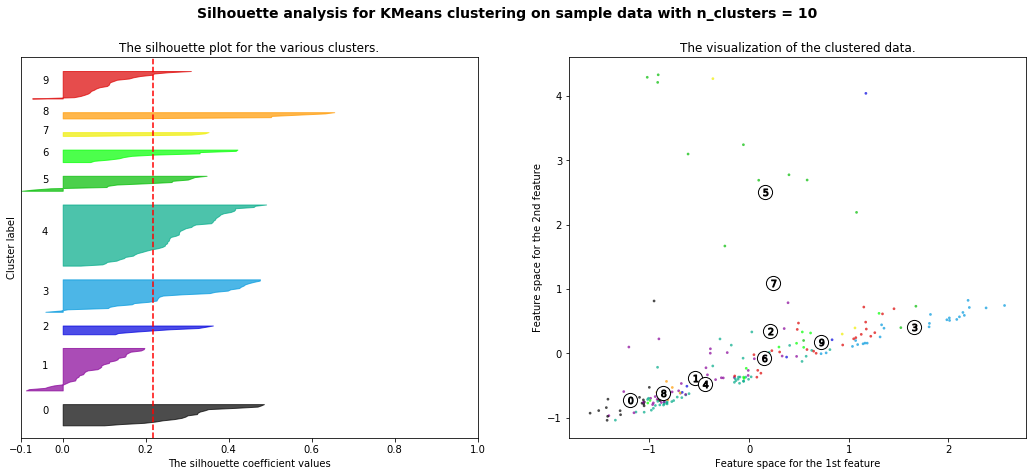

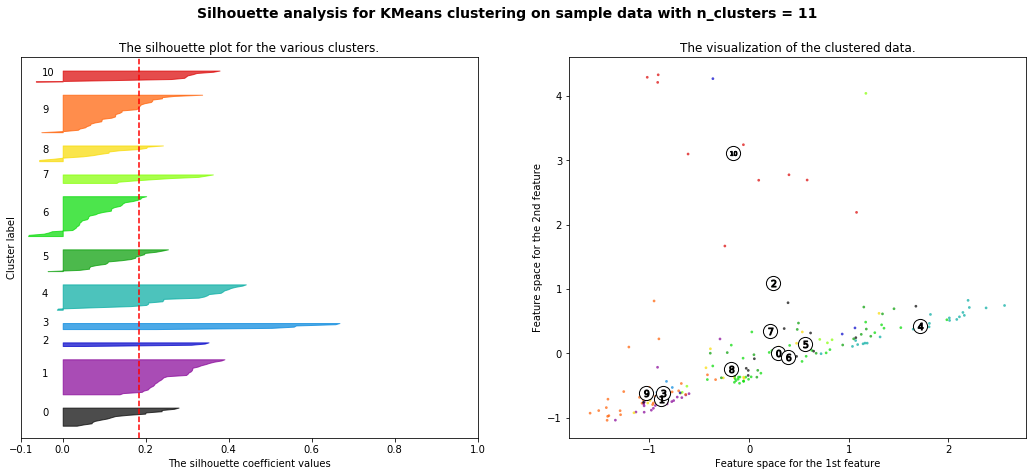

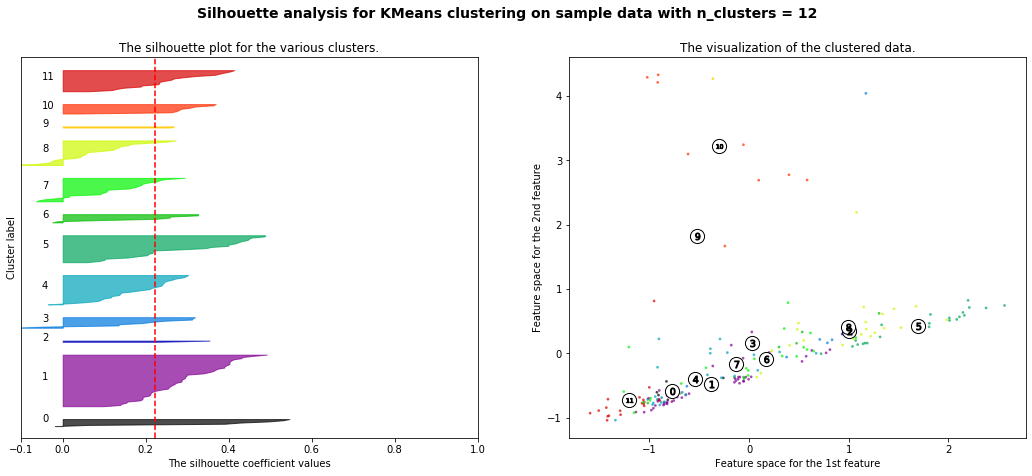

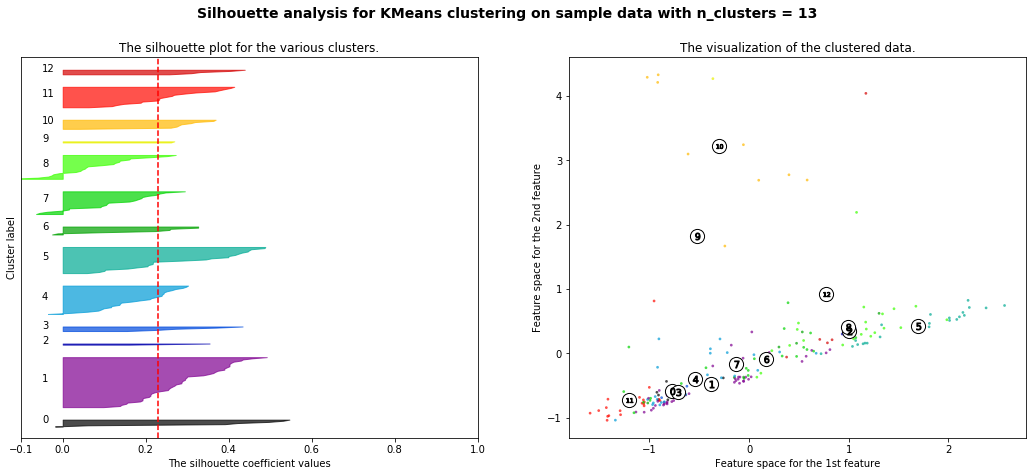

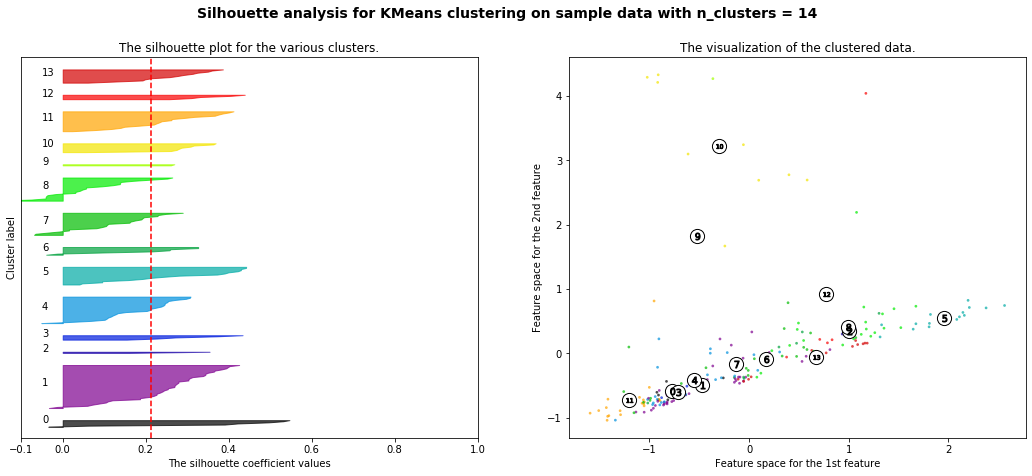

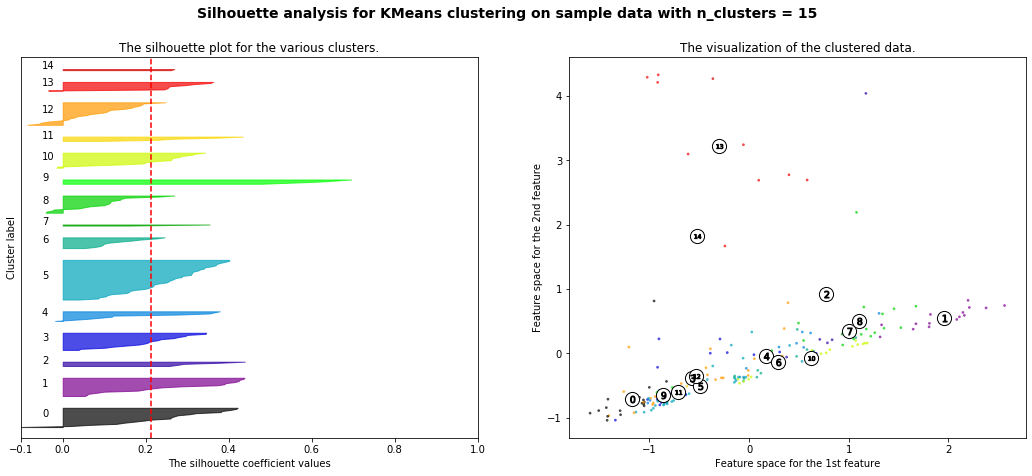

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
sil_score_k = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=3)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil_score_k.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

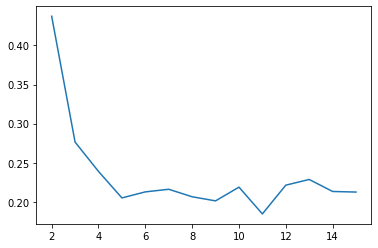

In [85]:
x = np.arange(2,16,1)
plt.plot(x,sil_score_k)
plt.show()

In [86]:
kmeans = KMeans(n_clusters=2, random_state=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [87]:
df_kmeans = parkinsons.copy()

In [88]:
df_kmeans['cluster'] = kmeans.labels_
df_kmeans.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,cluster
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,0
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,0


### Gaussian Mixture Model

Automatically created module for IPython interactive environment


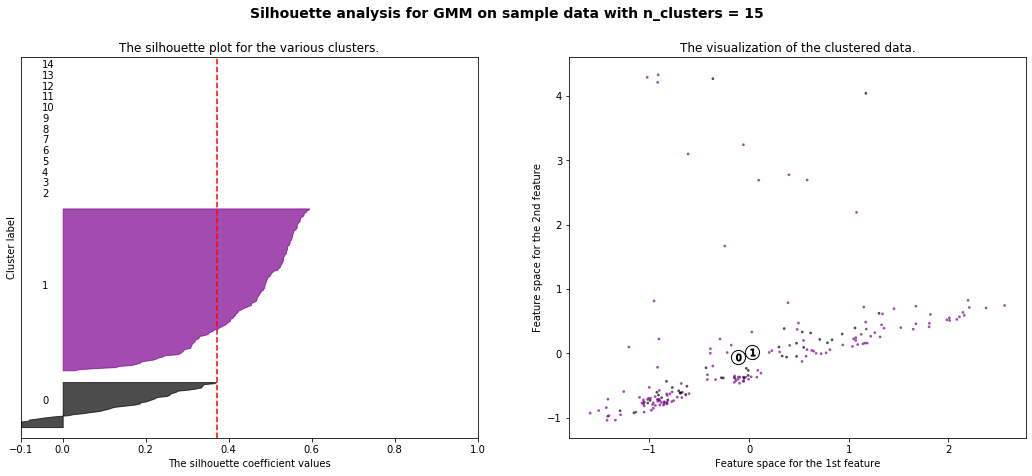

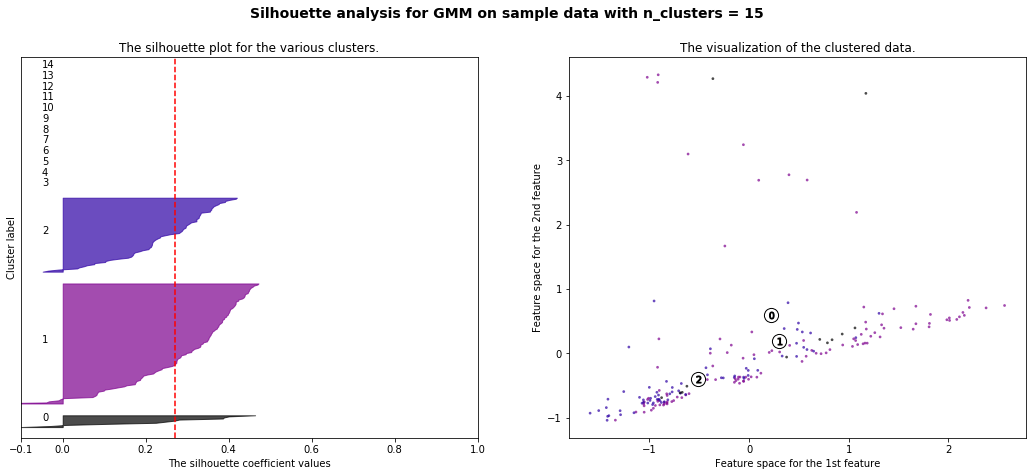

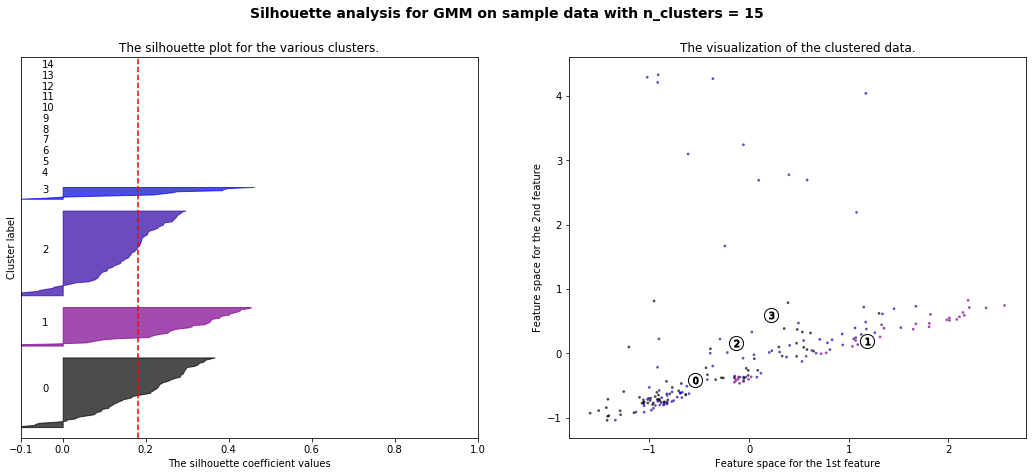

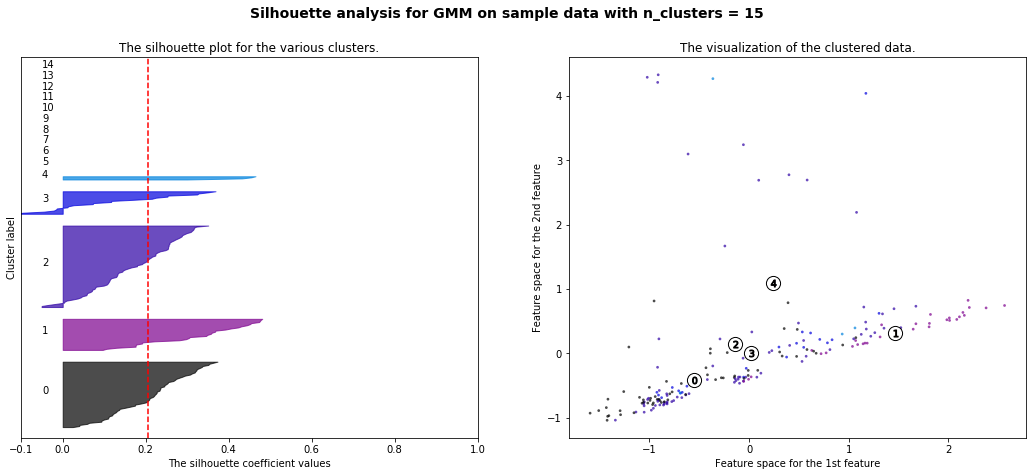

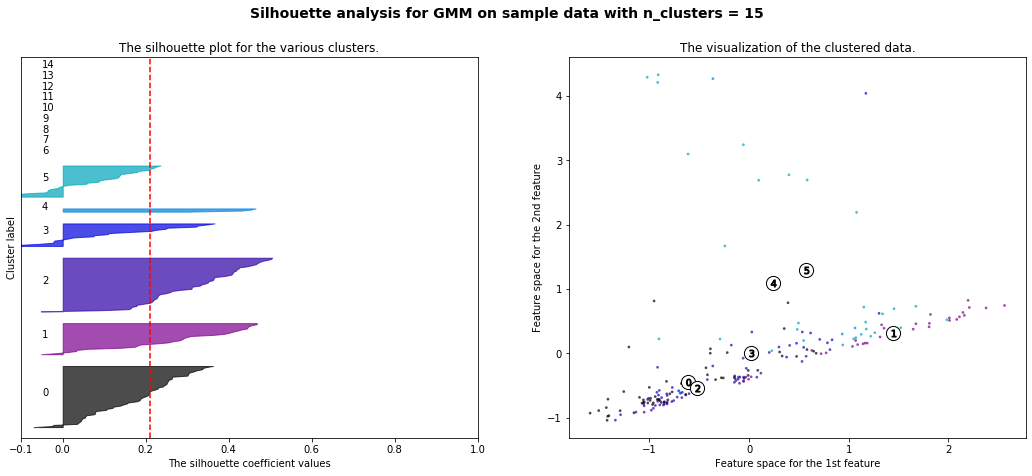

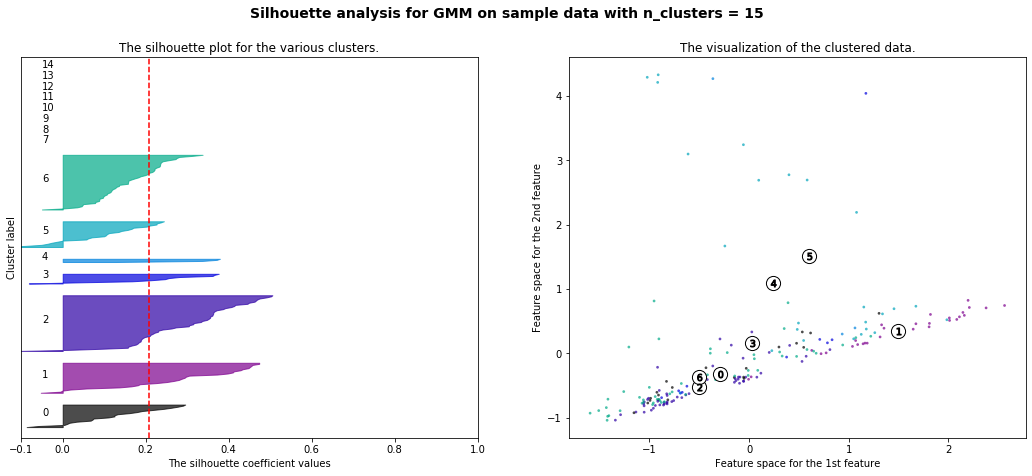

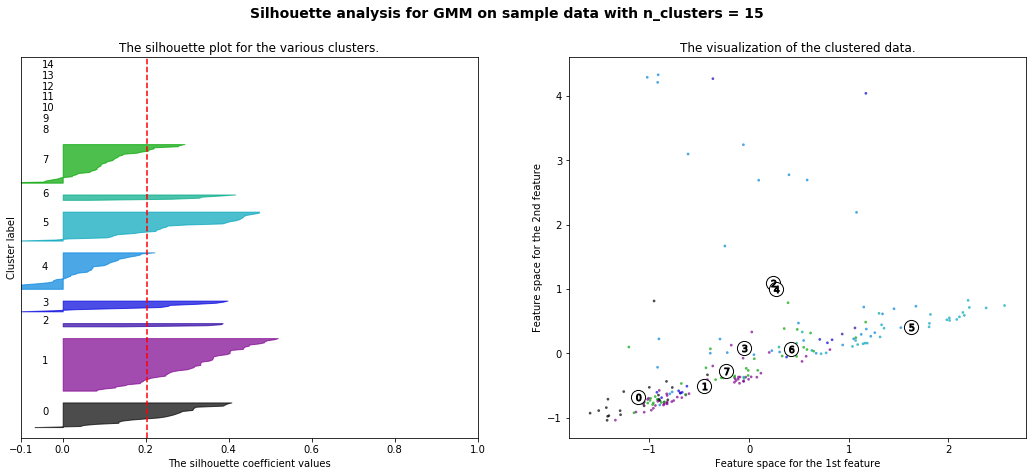

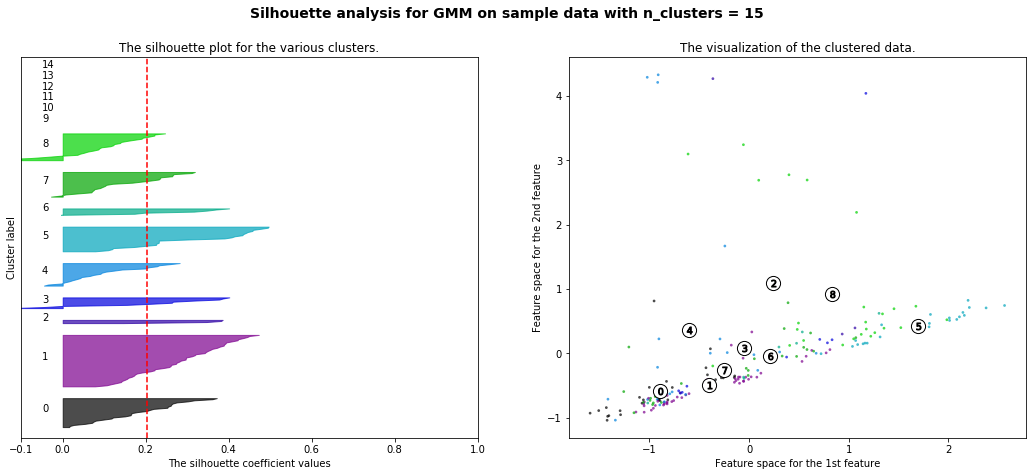

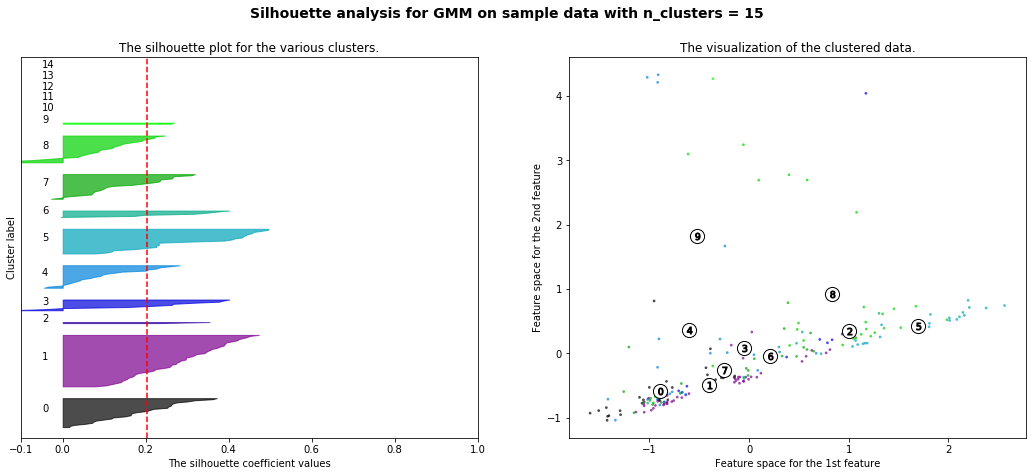

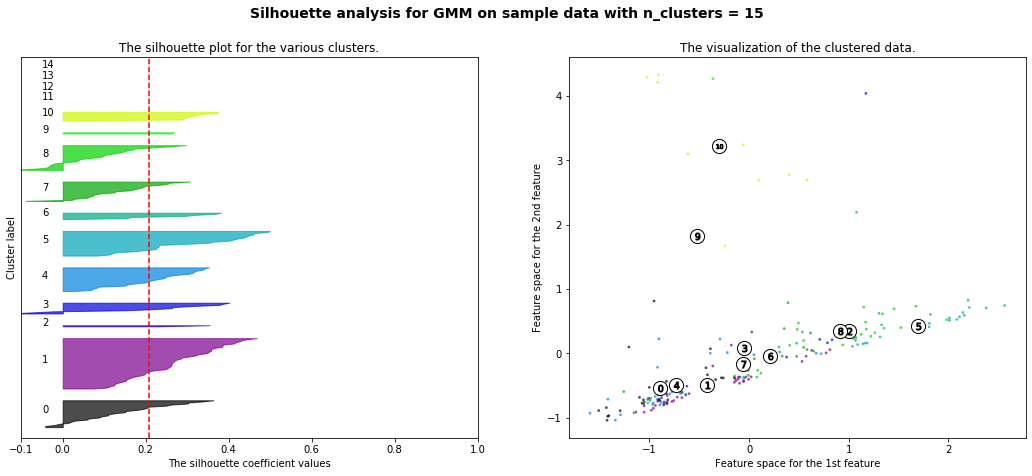

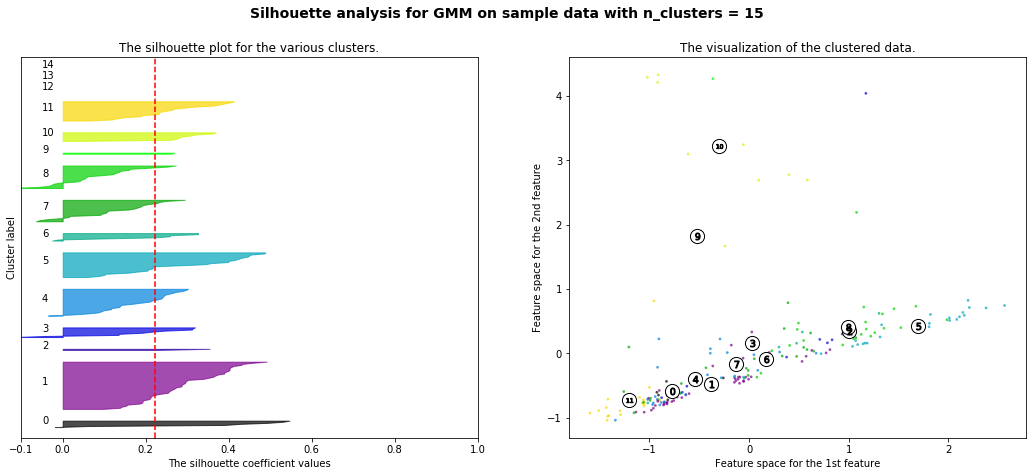

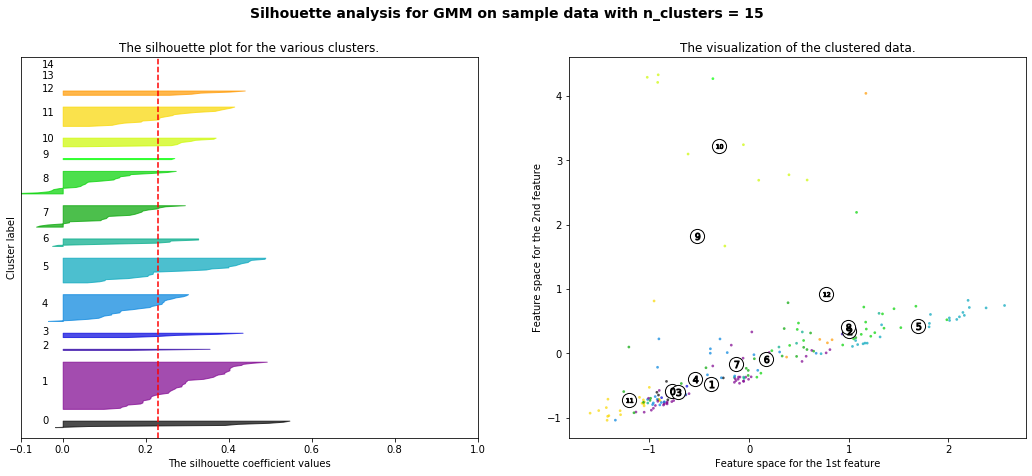

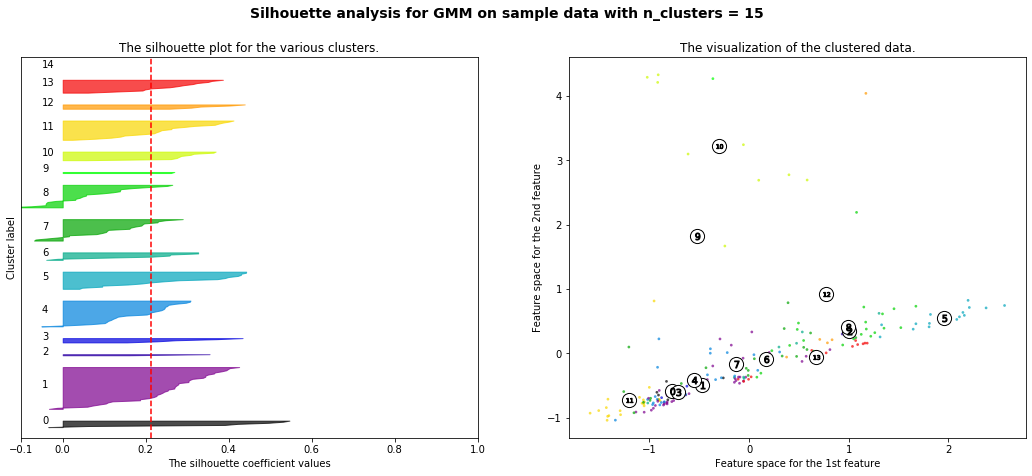

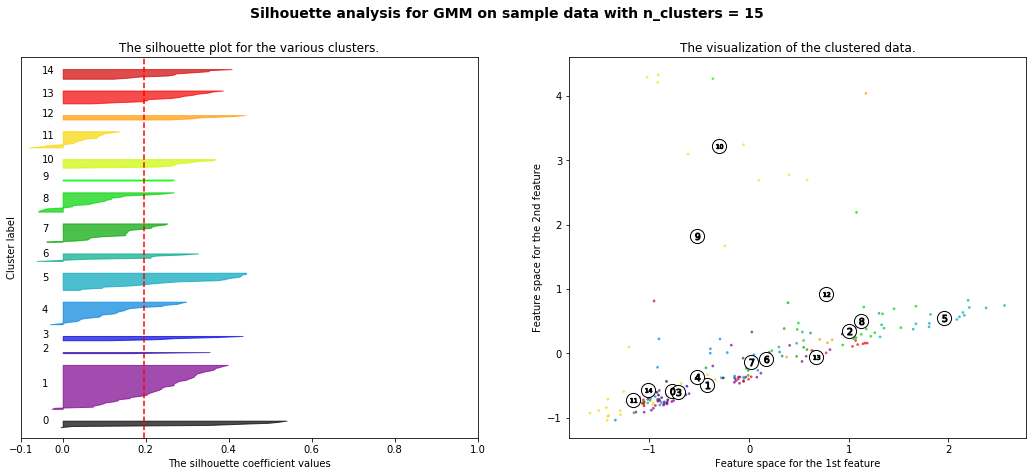

In [89]:
from sklearn.mixture import GaussianMixture
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_comp = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
sil_score_gmm = []
for n_comp in range_n_comp:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_comp, random_state=3)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil_score_gmm.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for GMM on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

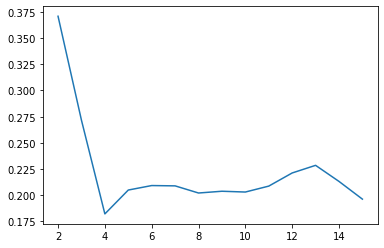

In [90]:
x = np.arange(2,16,1)
plt.plot(x,sil_score_gmm)
plt.show()

In [91]:
gmm = GaussianMixture(n_components=2, random_state=3).fit(X)
gmm_labels = gmm.predict(X)
gmm_labels

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [92]:
df_gmm = parkinsons.copy()
df_gmm['cluster'] = gmm_labels

In [93]:
df_gmm.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,cluster
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,0
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,0


## Section C

### Assigning cluster to new data point

#### k-means clustering - New observed point belong to cluster 1. The following code block shows the proof of observation.

In [94]:
x_new = df_kmeans.mean().values[:22]
x_new

array([ 1.54228641e+02,  1.97104918e+02,  1.16324631e+02,  6.22046154e-03,
        4.39589744e-05,  3.30641026e-03,  3.44635897e-03,  9.91994872e-03,
        2.97091282e-02,  2.82251282e-01,  1.56641538e-02,  1.78782564e-02,
        2.40814872e-02,  4.69926154e-02,  2.48470769e-02,  2.18859744e+01,
        7.53846154e-01,  4.98535538e-01,  7.18099046e-01, -5.68439674e+00,
        2.26510349e-01,  2.38182609e+00])

In [95]:
def euclidian(p1, p2):
  distance = np.linalg.norm(p1-p2)
  return distance

In [96]:
centroids = kmeans.cluster_centers_
centroids.shape

(2, 22)

In [97]:
for point in centroids:
    print(point)
    print('Distance',euclidian(x_new,point))

[-0.03572687  0.0782951  -0.05400787  1.55935218  1.41196332  1.54291126
  1.61185068  1.54278922  1.83563305  1.82196858  1.80204826  1.84366265
  1.69266569  1.80202092  1.47324148 -1.50743144  0.57002117  0.35763137
  1.21902041  0.93400567  1.14186841  1.31966326]
Distance 277.1031032485781
[ 0.00649579 -0.01423547  0.00981961 -0.28351858 -0.2567206  -0.28052932
 -0.29306376 -0.28050713 -0.33375146 -0.33126701 -0.32764514 -0.33521139
 -0.3077574  -0.32764017 -0.26786209  0.27407844 -0.10364021 -0.06502389
 -0.22164007 -0.16981921 -0.20761244 -0.23993877]
Distance 276.9070938568197


Index of centroid (the one close to new observed point) 

In [98]:
np.argmin(np.linalg.norm(X - centroids[1], axis=1))

95

To find which cluster centroid belongs to 

In [99]:
df_kmeans.iloc[95]

name                phon_R01_S22_5
MDVP:Fo(Hz)                157.447
MDVP:Fhi(Hz)               163.267
MDVP:Flo(Hz)               149.605
MDVP:Jitter(%)             0.00369
MDVP:Jitter(Abs)             2e-05
MDVP:RAP                   0.00201
MDVP:PPQ                   0.00197
Jitter:DDP                 0.00602
MDVP:Shimmer               0.03272
MDVP:Shimmer(dB)             0.283
Shimmer:APQ3               0.01813
Shimmer:APQ5               0.01909
MDVP:APQ                   0.02571
Shimmer:DDA                0.05439
NHR                        0.01018
HNR                         21.693
status                           1
RPDE                      0.447285
DFA                       0.705658
spread1                   -6.24708
spread2                   0.180528
D2                         2.34435
PPE                       0.164916
cluster                          1
Name: 95, dtype: object

## Section D

### Chi-square distribtion of k-means

In [100]:
result_km = df_kmeans[['status','cluster']]
result_km

,status,cluster
0,1,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
190,0,1
191,0,1
192,0,1
193,0,1


In [142]:
print(result_km[(result_km['cluster'] == 0) & (result_km['status'] == 0)].shape[0],
result_km[(result_km['cluster'] == 0) & (result_km['status'] == 1)].shape[0],
result_km[(result_km['cluster'] == 1) & (result_km['status'] == 0)].shape[0],
result_km[(result_km['cluster'] == 1) & (result_km['status'] == 1)].shape[0])

0 30 48 117


In [128]:
outcomes_kmeans = np.array([[0,30],[48,117]])
outcomes_kmeans

In [131]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(outcomes_kmeans)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 0.0015133005695552471
Dependent (reject H0)


In [132]:
stat, p, dof, expected

(10.06235022418058,
 0.0015133005695552471,
 1,
 array([[  7.38461538,  22.61538462],
        [ 40.61538462, 124.38461538]]))

### Chi-square distribtion of GMM

In [140]:
result_gmm = df_gmm[['status','cluster']]
result_gmm

,status,cluster
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
190,0,1
191,0,1
192,0,1
193,0,1


In [141]:
print(result_gmm[(result_gmm['cluster'] == 0) & (result_gmm['status'] == 0)].shape[0],
     result_gmm[(result_gmm['cluster'] == 0) & (result_gmm['status'] == 1)].shape[0],
     result_gmm[(result_gmm['cluster'] == 1) & (result_gmm['status'] == 0)].shape[0],
     result_gmm[(result_gmm['cluster'] == 1) & (result_gmm['status'] == 1)].shape[0])

0 43 48 104


In [143]:
outcomes_gmm = np.array([[0,43],[48,104]])

In [144]:
stat, p, dof, expected = chi2_contingency(outcomes_gmm)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 5.262046290348754e-05
Dependent (reject H0)


In [184]:
df_kmeans[(df_kmeans['cluster']==0)]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,cluster
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,0
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,0
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,0
18,phon_R01_S05_1,153.046,175.829,68.623,0.00742,0.00005,0.00364,0.00432,0.01092,0.05517,...,0.03160,17.280,1,0.665318,0.719467,-3.949079,0.357870,3.109010,0.377429,0
68,phon_R01_S18_3,143.533,162.215,65.809,0.01101,0.00008,0.00647,0.00467,0.01941,0.05384,...,0.04882,20.338,1,0.513237,0.731444,-5.869750,0.151814,2.118496,0.185580,0
71,phon_R01_S18_6,136.358,176.595,65.750,0.00971,0.00007,0.00534,0.00478,0.01601,0.04978,...,0.03361,18.570,1,0.543299,0.733232,-5.207985,0.224852,2.642276,0.242981,0
84,phon_R01_S21_1,176.858,205.560,75.344,0.00747,0.00004,0.00418,0.00420,0.01254,0.04795,...,0.05470,13.893,1,0.556494,0.729586,-5.288912,0.343073,3.099301,0.242119,0
87,phon_R01_S21_4,176.281,227.381,125.610,0.00520,0.00003,0.00287,0.00312,0.00862,0.06511,...,0.04824,13.922,1,0.602874,0.740837,-5.515071,0.299549,3.136550,0.220968,0


#### Inference
In both models (k-means and GMM), cluster labels are dependent on actual values. From data analysis, it is observed that the relationship between cluster membership and parkinsons status is mostly influenced by spread1 feature